In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM,GRU,regularizers
from sklearn import preprocessing                                                                                     
from math import sqrt
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import math
import tensorflow as tf

E:\Anacoda3 REAL\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class Model:
    def __init__(
        self,
        units,
        dropout_rate,
        input_shape,
        loss_funtion,
        optimizer_function
    ):
        self.units=units
        self.dropout_rate=dropout_rate
        self.input_shape=input_shape
        self.loss_function=loss_function
        self.optimizer_function=optimizer_function
    def getModel(self):
#         model = Sequential()
    
#         # Adding the first LSTM layer and some Dropout regularisation
#         model.add(LSTM(units = self.units, return_sequences = True, input_shape = self.input_shape))
#         model.add(Dropout(self.dropout_rate))

#         # Adding a second LSTM layer and some Dropout regularisation
#         model.add(LSTM(units = self.units, return_sequences = True))
#         model.add(Dropout(self.dropout_rate))

#         # Adding a third LSTM layer and some Dropout regularisation
#         model.add(LSTM(units = self.units,return_sequences=True))
#         model.add(Dropout(self.dropout_rate))
        
#         # Adding a fourth LSTM layer and some Dropout regularisation
#         model.add(LSTM(units = self.units))
#         model.add(Dropout(self.dropout_rate))

#         # Adding the output layer
#         model.add(Dense(units = 1))

#         model.compile(loss=self.loss_function, optimizer=self.optimizer_function)
        
        model = Sequential()

        model.add(GRU(self.units, input_shape=self.input_shape))   
        model.add(Dense(1))

        model.compile(loss=self.loss_function, optimizer=self.optimizer_function)

        return model
        

In [3]:
def data_to_x_y(data,n_in_steps,n_out_steps):
    X_data,y_data=[],[]
    for i in range(0,data.shape[0]-n_in_steps-n_out_steps):
        X_data.append(data[i:i+n_in_steps])
        y_data.append(data[i+n_in_steps+n_out_steps-1])
    X_data=np.array(X_data)
    y_data=np.array(y_data)
    X_data=X_data.reshape(X_data.shape[0],X_data.shape[1],1)
    y_data=y_data.reshape(y_data.shape[0],1)
    return X_data,y_data

In [4]:
def train_test_split(X_data,y_data,train_percentage):
    n_train_intervals = math.ceil(X_data.shape[0] * train_percentage) 
    X_train,y_train=X_data[:n_train_intervals],y_data[:n_train_intervals]
    X_test,y_test=X_data[n_train_intervals:],y_data[n_train_intervals:]
    return X_train,y_train,X_test,y_test

In [5]:
stock_name='HD'

In [6]:
filepath='../../dataset/emd/'+stock_name+'-5year-emd.csv'
df=pd.read_csv(open(filepath))
future_day=20
timestep=40

In [7]:
minmax_list=[]
df_log_list=[]
X_train_list,y_train_list=[],[]
X_test_list,y_test_list=[],[]
for i in range(df.shape[1]//2-1,df.shape[1]):
    minmax = MinMaxScaler().fit(df.iloc[:, i].values.reshape(-1,1))
    minmax_list.append(minmax)
    df_log = minmax.transform(df.iloc[:, i].values.reshape(-1,1))
    df_log_list.append(df_log)
    X_data,y_data=data_to_x_y(df_log,timestep,future_day)
    X_train,y_train,X_test,y_test=train_test_split(X_data,y_data,0.7)
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

In [8]:
print(X_train_list[0].shape)
print(len(X_train_list))

(840, 40, 1)
6


In [9]:
units=8
dropout_rate=0.4
input_shape=(timestep,1)
loss_function='mae'
optimizer_function='adam'
n_batch=20
n_epochs=50

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 6s - loss: 0.1881 - val_loss: 0.1436
Epoch 2/50
 - 2s - loss: 0.0463 - val_loss: 0.1362
Epoch 3/50
 - 2s - loss: 0.0452 - val_loss: 0.1363
Epoch 4/50
 - 2s - loss: 0.0450 - val_loss: 0.1358
Epoch 5/50
 - 2s - loss: 0.0449 - val_loss: 0.1355
Epoch 6/50
 - 2s - loss: 0.0447 - val_loss: 0.1350
Epoch 7/50
 - 2s - loss: 0.0447 - val_loss: 0.1350
Epoch 8/50
 - 2s - loss: 0.0445 - val_loss: 0.1344
Epoch 9/50
 - 2s - loss: 0.0446 - val_loss: 0.1343
Epoch 10/50
 - 2s - loss: 0.0444 - val_loss: 0.1341
Epoch 11/50
 - 2s - loss: 0.0443 - val_loss: 0.1339
Epoch 12/50
 - 2s - loss: 0.0443 - val_loss: 0.1337
Epoch 13/50
 - 2s - loss: 0.0442 - val_loss: 0.1335
Epoch 14/50
 - 2s - loss: 0.0441 - val_loss: 0.1333
Epoch 15/50
 - 2s - loss: 0.0441 - val_loss: 0.1332
Epoch 16/50
 - 3s - loss: 0.0440 - val_loss: 0.1329
Epoch 17/50
 - 2s - loss: 0.0440 - val_loss: 0.1330
Epoch 18/50
 - 3s - loss: 0.0439 - val_loss: 0.1327
Epoch 19/50
 -

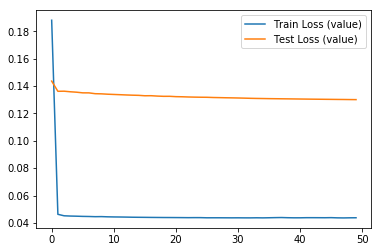

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 3s - loss: 0.2286 - val_loss: 0.2542
Epoch 2/50
 - 2s - loss: 0.1091 - val_loss: 0.2505
Epoch 3/50
 - 2s - loss: 0.1058 - val_loss: 0.2449
Epoch 4/50
 - 2s - loss: 0.1036 - val_loss: 0.2391
Epoch 5/50
 - 2s - loss: 0.1015 - val_loss: 0.2327
Epoch 6/50
 - 2s - loss: 0.0991 - val_loss: 0.2263
Epoch 7/50
 - 2s - loss: 0.0967 - val_loss: 0.2196
Epoch 8/50
 - 2s - loss: 0.0941 - val_loss: 0.2126
Epoch 9/50
 - 2s - loss: 0.0913 - val_loss: 0.2051
Epoch 10/50
 - 2s - loss: 0.0880 - val_loss: 0.1973
Epoch 11/50
 - 2s - loss: 0.0847 - val_loss: 0.1888
Epoch 12/50
 - 2s - loss: 0.0809 - val_loss: 0.1801
Epoch 13/50
 - 2s - loss: 0.0771 - val_loss: 0.1722
Epoch 14/50
 - 2s - loss: 0.0740 - val_loss: 0.1652
Epoch 15/50
 - 2s - loss: 0.0715 - val_loss: 0.1596
Epoch 16/50
 - 2s - loss: 0.0714 - val_loss: 0.1570
Epoch 17/50
 - 2s - loss: 0.0690 - val_loss: 0.1551
Epoch 18/50
 - 2s - loss: 0.0700 - val_loss: 0.1544
Epoch 19/50
 -

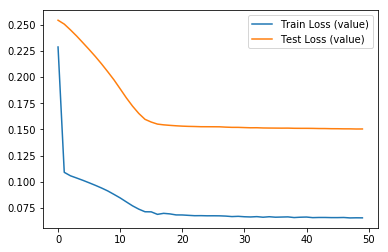

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 3s - loss: 0.1730 - val_loss: 0.1857
Epoch 2/50
 - 2s - loss: 0.0492 - val_loss: 0.1719
Epoch 3/50
 - 2s - loss: 0.0469 - val_loss: 0.1706
Epoch 4/50
 - 2s - loss: 0.0465 - val_loss: 0.1716
Epoch 5/50
 - 2s - loss: 0.0463 - val_loss: 0.1720
Epoch 6/50
 - 2s - loss: 0.0460 - val_loss: 0.1727
Epoch 7/50
 - 2s - loss: 0.0458 - val_loss: 0.1731
Epoch 8/50
 - 2s - loss: 0.0456 - val_loss: 0.1736
Epoch 9/50
 - 2s - loss: 0.0454 - val_loss: 0.1741
Epoch 10/50
 - 2s - loss: 0.0452 - val_loss: 0.1745
Epoch 11/50
 - 2s - loss: 0.0450 - val_loss: 0.1749
Epoch 12/50
 - 2s - loss: 0.0448 - val_loss: 0.1750
Epoch 13/50
 - 2s - loss: 0.0446 - val_loss: 0.1753
Epoch 14/50
 - 2s - loss: 0.0442 - val_loss: 0.1756
Epoch 15/50
 - 2s - loss: 0.0439 - val_loss: 0.1757
Epoch 16/50
 - 2s - loss: 0.0435 - val_loss: 0.1756
Epoch 17/50
 - 2s - loss: 0.0432 - val_loss: 0.1752
Epoch 18/50
 - 2s - loss: 0.0427 - val_loss: 0.1746
Epoch 19/50
 -

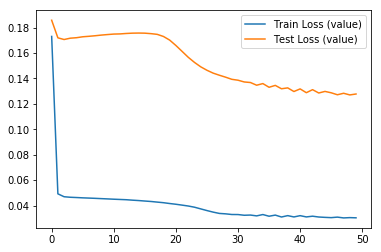

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 3s - loss: 0.1839 - val_loss: 0.1261
Epoch 2/50
 - 2s - loss: 0.0564 - val_loss: 0.1098
Epoch 3/50
 - 2s - loss: 0.0473 - val_loss: 0.1118
Epoch 4/50
 - 2s - loss: 0.0472 - val_loss: 0.1102
Epoch 5/50
 - 2s - loss: 0.0463 - val_loss: 0.1089
Epoch 6/50
 - 2s - loss: 0.0456 - val_loss: 0.1075
Epoch 7/50
 - 2s - loss: 0.0449 - val_loss: 0.1063
Epoch 8/50
 - 2s - loss: 0.0442 - val_loss: 0.1053
Epoch 9/50
 - 2s - loss: 0.0436 - val_loss: 0.1039
Epoch 10/50
 - 2s - loss: 0.0430 - val_loss: 0.1030
Epoch 11/50
 - 2s - loss: 0.0436 - val_loss: 0.1013
Epoch 12/50
 - 2s - loss: 0.0432 - val_loss: 0.1007
Epoch 13/50
 - 2s - loss: 0.0425 - val_loss: 0.1006
Epoch 14/50
 - 2s - loss: 0.0422 - val_loss: 0.1010
Epoch 15/50
 - 2s - loss: 0.0421 - val_loss: 0.1011
Epoch 16/50
 - 2s - loss: 0.0420 - val_loss: 0.1008
Epoch 17/50
 - 2s - loss: 0.0418 - val_loss: 0.1010
Epoch 18/50
 - 2s - loss: 0.0417 - val_loss: 0.1011
Epoch 19/50
 -

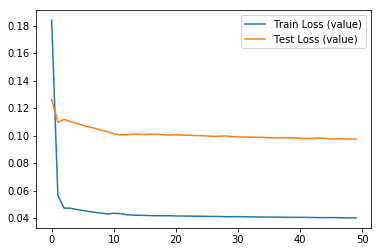

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 3s - loss: 0.1189 - val_loss: 0.1010
Epoch 2/50
 - 2s - loss: 0.0679 - val_loss: 0.0955
Epoch 3/50
 - 2s - loss: 0.0664 - val_loss: 0.0895
Epoch 4/50
 - 2s - loss: 0.0642 - val_loss: 0.0850
Epoch 5/50
 - 2s - loss: 0.0632 - val_loss: 0.0807
Epoch 6/50
 - 2s - loss: 0.0619 - val_loss: 0.0779
Epoch 7/50
 - 2s - loss: 0.0612 - val_loss: 0.0755
Epoch 8/50
 - 2s - loss: 0.0604 - val_loss: 0.0742
Epoch 9/50
 - 2s - loss: 0.0602 - val_loss: 0.0725
Epoch 10/50
 - 2s - loss: 0.0599 - val_loss: 0.0708
Epoch 11/50
 - 2s - loss: 0.0594 - val_loss: 0.0699
Epoch 12/50
 - 2s - loss: 0.0592 - val_loss: 0.0690
Epoch 13/50
 - 2s - loss: 0.0589 - val_loss: 0.0684
Epoch 14/50
 - 2s - loss: 0.0589 - val_loss: 0.0676
Epoch 15/50
 - 2s - loss: 0.0586 - val_loss: 0.0671
Epoch 16/50
 - 2s - loss: 0.0585 - val_loss: 0.0666
Epoch 17/50
 - 2s - loss: 0.0583 - val_loss: 0.0665
Epoch 18/50
 - 2s - loss: 0.0582 - val_loss: 0.0662
Epoch 19/50
 -

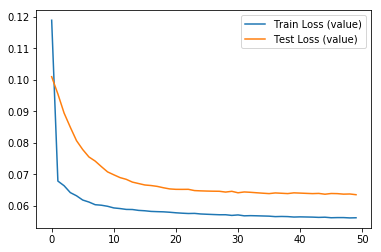

(840, 40, 1)
Train on 840 samples, validate on 359 samples
Epoch 1/50
 - 3s - loss: 0.1691 - val_loss: 0.7662
Epoch 2/50
 - 2s - loss: 0.1711 - val_loss: 0.6123
Epoch 3/50
 - 2s - loss: 0.1446 - val_loss: 0.4894
Epoch 4/50
 - 2s - loss: 0.1191 - val_loss: 0.3714
Epoch 5/50
 - 2s - loss: 0.0905 - val_loss: 0.2413
Epoch 6/50
 - 2s - loss: 0.0537 - val_loss: 0.0706
Epoch 7/50
 - 2s - loss: 0.0261 - val_loss: 0.0266
Epoch 8/50
 - 2s - loss: 0.0149 - val_loss: 0.0242
Epoch 9/50
 - 2s - loss: 0.0075 - val_loss: 0.0180
Epoch 10/50
 - 2s - loss: 0.0052 - val_loss: 0.0246
Epoch 11/50
 - 2s - loss: 0.0015 - val_loss: 0.0189
Epoch 12/50
 - 2s - loss: 0.0029 - val_loss: 0.0194
Epoch 13/50
 - 2s - loss: 0.0065 - val_loss: 0.0154
Epoch 14/50
 - 2s - loss: 0.0015 - val_loss: 0.0112
Epoch 15/50
 - 2s - loss: 0.0117 - val_loss: 0.0164
Epoch 16/50
 - 2s - loss: 0.0013 - val_loss: 0.0146
Epoch 17/50
 - 2s - loss: 0.0037 - val_loss: 0.0193
Epoch 18/50
 - 2s - loss: 0.0031 - val_loss: 0.0136
Epoch 19/50
 -

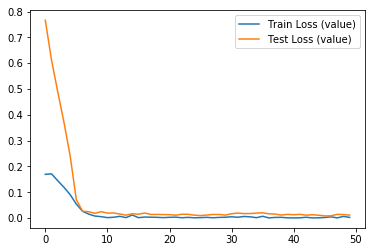

In [10]:
model_list=[]
for i in range(len(X_train_list)):  #len(X_train_list)
    x_train=X_train_list[i]
    y_train=y_train_list[i]
    x_test=X_test_list[i]
    y_test=y_test_list[i]
    print(x_train.shape)
    model=Model(units,dropout_rate,input_shape,loss_function,optimizer_function).getModel()
    history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=n_epochs, 
                        batch_size=n_batch,verbose=2,shuffle=False)
    model_list.append(model)
    model.save('../../model/%s/emd_10step_%d.h5' % (stock_name,i))
    plt.plot(history.history["loss"] , label="Train Loss (%s)" % 'value')
    plt.plot(history.history["val_loss"], label="Test Loss (%s)" % 'value')
    plt.legend()
    plt.savefig('../../image/EMD/'+stock_name+'/trainloss/'+str(future_day)+'step_trainloss%d.png'% i)
    plt.show()

In [11]:
print(len(model_list))
print(len(X_test_list))
print(len(minmax_list))

6
6
6


359/359 [==============================] - 0s 1ms/step


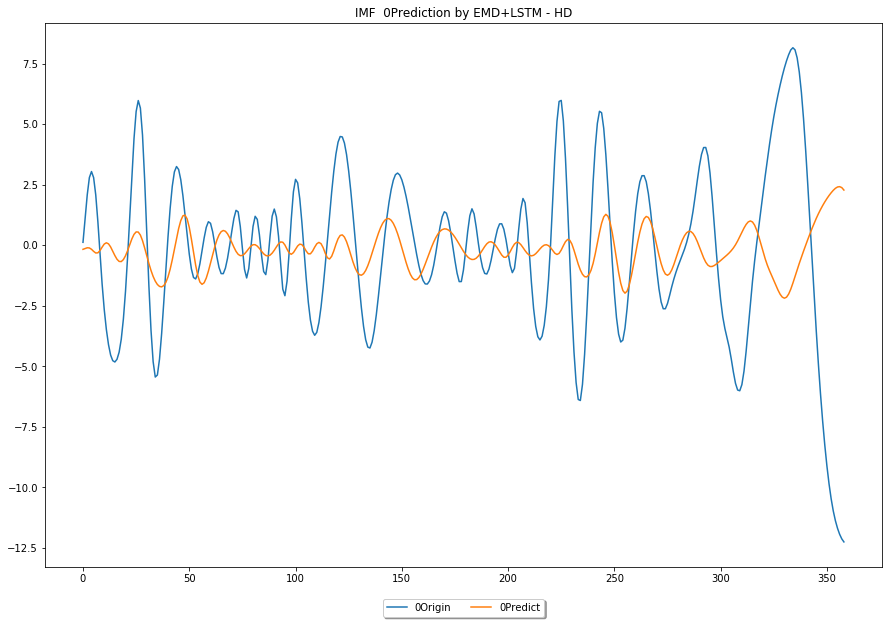

359/359 [==============================] - 0s 1ms/step


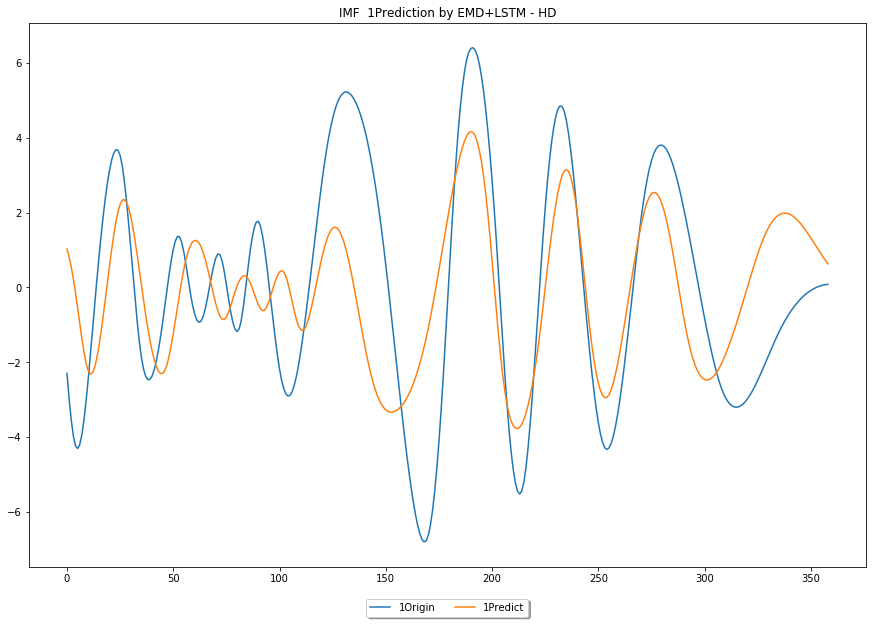

359/359 [==============================] - 0s 1ms/step


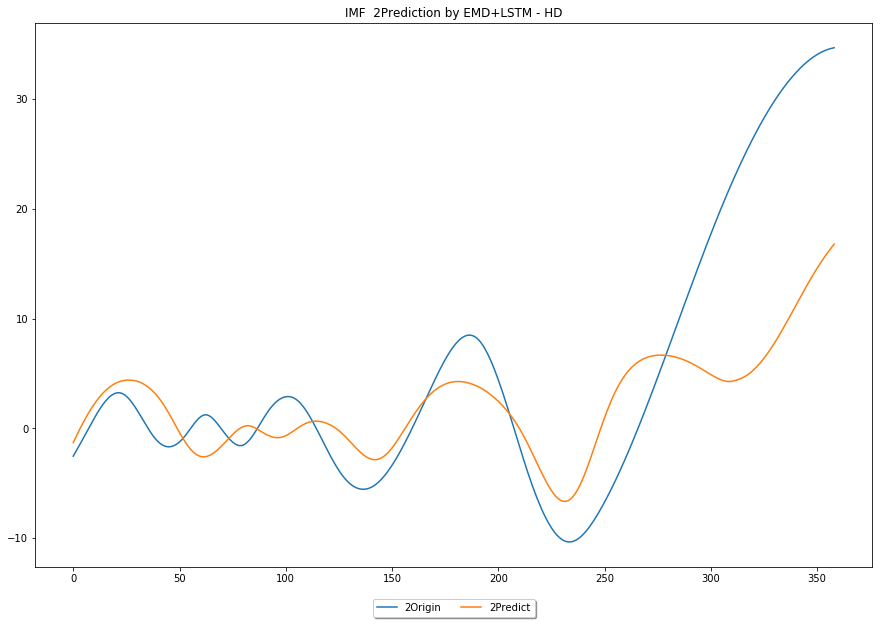

359/359 [==============================] - 0s 1ms/step


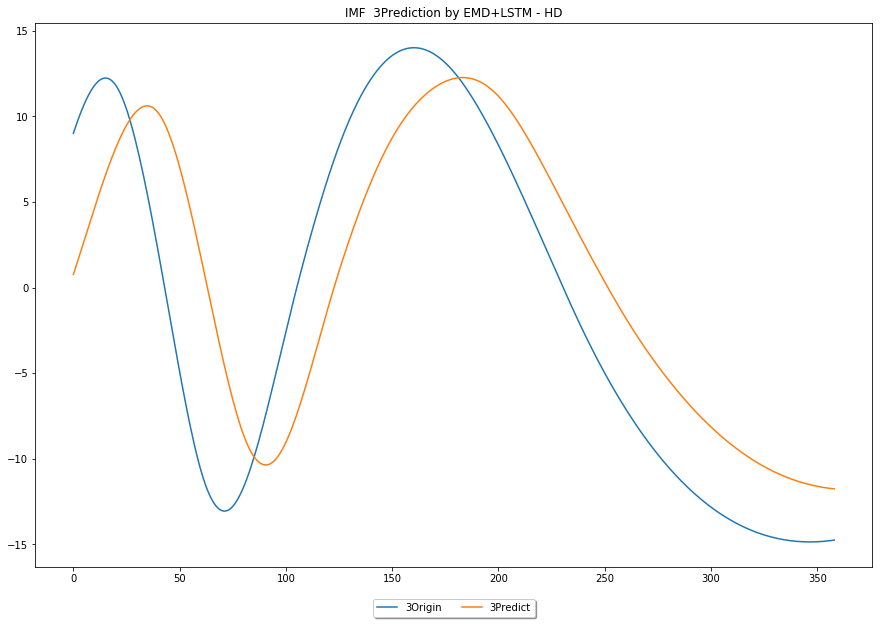

359/359 [==============================] - 0s 1ms/step


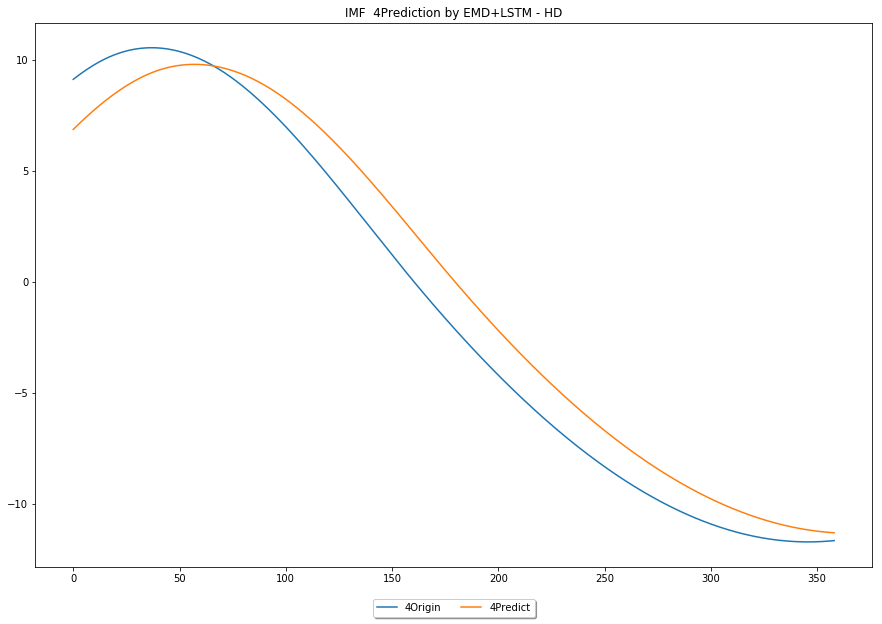

359/359 [==============================] - 0s 1ms/step


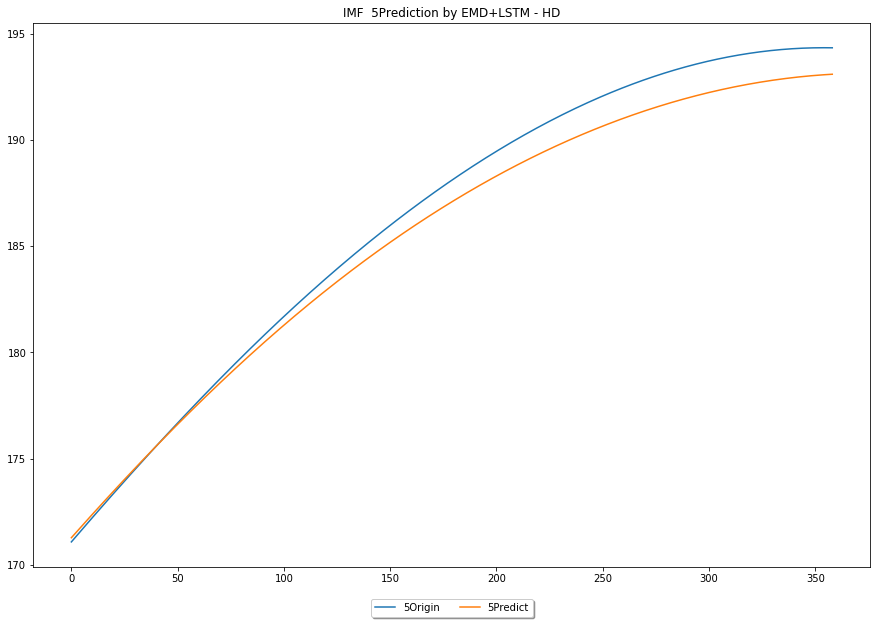

In [12]:
#test
comb=np.ones((y_test_list[0].shape[0],y_test_list[0].shape[1]))
for i in range(len(model_list)):
    x_test=X_test_list[i]
    y_test=y_test_list[i]
    model=model_list[i]
    ypre=model.predict(x_test,batch_size=n_batch,verbose=1)
    minmax=minmax_list[i]
    inv_yhat=minmax.inverse_transform(ypre.reshape(-1,1))
    inv_ytest=minmax.inverse_transform(y_test.reshape(-1,1))
    comb+=inv_yhat
    plt.figure(figsize=(15,10))
    plt.plot(inv_ytest,label=str(i)+'Origin')
    plt.plot(inv_yhat,label=str(i)+'Predict')
    plt.legend(
        loc = 'upper center',
        bbox_to_anchor = (0.5, -0.05),
        fancybox = True,
        shadow = True,
        ncol = 5,
    )
    plt.title('IMF % dPrediction by EMD+LSTM - %s'%(i,stock_name))
    plt.savefig('../../image/EMD/'+stock_name+'/IMF_fit/'+str(future_day)+'step_IMF%d.png'% i)
    plt.show()

In [13]:
filepath='../../dataset/5year/'+stock_name+'-5year.csv'
df_all=pd.read_csv(open(filepath))
df_all_test=df_all.iloc[-y_test.shape[0]:]['Close']
df_all_test.shape

(359,)

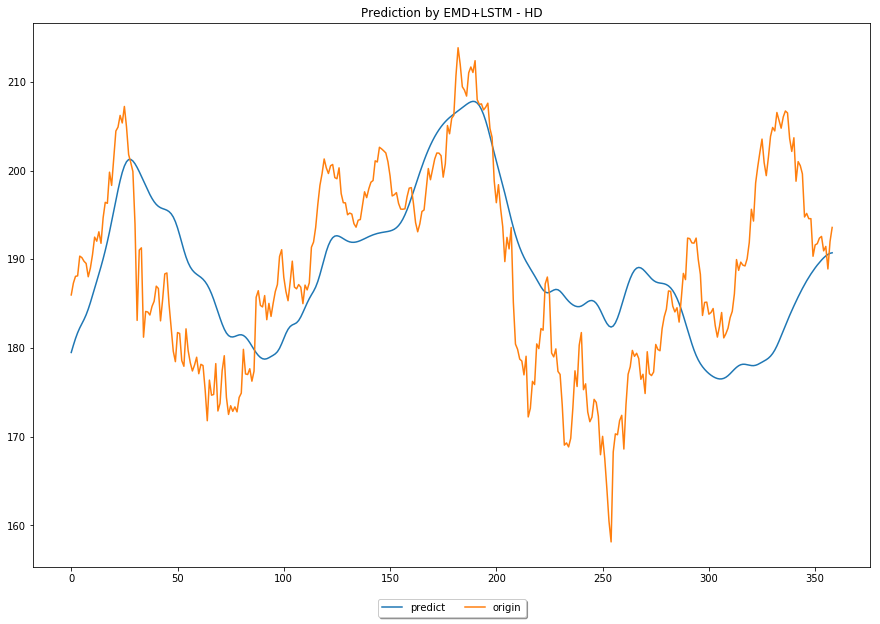

In [14]:
plt.figure(figsize=(15,10))
plt.plot(comb,label='predict')
plt.plot(df_all_test.values,label='origin')
plt.legend(
        loc = 'upper center',
        bbox_to_anchor = (0.5, -0.05),
        fancybox = True,
        shadow = True,
        ncol = 5,
)
plt.title('Prediction by EMD+LSTM - %s'%stock_name)
plt.savefig('../../image/EMD/'+stock_name+'/result/'+str(future_day)+'step_result.png')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse=math.sqrt(mean_squared_error(comb, df_all_test.values))
mae=mean_absolute_error(comb, df_all_test.values)
avg=np.mean(df_all_test.values)
rmse_error_percentage=rmse/avg
mae_error_percentage=mae/avg
print("")
print("Test Average Value for %s: %.3f" % ('Open', avg))
print("Test Root Mean Square Error: %.3f" % rmse)
print("Test MAE: %.3f" % mae)
print("Test RMSE Error Percentage: %.2f/100.00" % (rmse_error_percentage * 100))
print("Test MAE Error Percentage: %.2f/100.00" % (mae_error_percentage * 100))


Test Average Value for Open: 188.941
Test Root Mean Square Error: 9.825
Test MAE: 8.071
Test RMSE Error Percentage: 5.20/100.00
Test MAE Error Percentage: 4.27/100.00
